До цього ми розглядали **лінійні** структури даних (стек, черга, зв'язний список, геш-таблиця тощо). Під **лінійністю** тут перш за все мається на увазі відсутність якогось іншого зв'язку елементів між собою, окрім, можливо, порядку. Але ми постійно зустрічаємось з задачами, де присутній **ієрархічний** зв'язок між даними.

Візуалізація родового **дерева**, робота з HTML, файлова система, прийняття рішень, компіляція коду. Це все приклади задач, що вимагають роботи саме з ієрархією об'єктів. І для цього нам потрібні так звані **дерева**.

Давайте візуалізуємо приклад дерева за допомогою бібліотек networkx і graphviz.

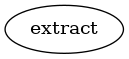

In [2]:
import os

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from graphviz import Digraph

from IPython.display import Image, display

def create_filesystem_tree(root_path):
    fs_tree = nx.DiGraph()
    fs_tree.add_node(root_path)
    for root, dirs, files in os.walk(root_path):
        for dir in dirs:
            fs_tree.add_node(os.path.join(root, dir))
            fs_tree.add_edge(root, os.path.join(root, dir))
        for file in files:
            fs_tree.add_node(os.path.join(root, file))
            fs_tree.add_edge(root, os.path.join(root, file))
    return fs_tree

PATH = "/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract"

fs_tree = create_filesystem_tree(PATH)
pos = graphviz_layout(fs_tree, prog='dot')
dot = Digraph()
for node in fs_tree.nodes:
    dot.node(node, node.split('/')[-1])
for edge in fs_tree.edges:
    dot.edge(edge[0], edge[1])
dot.format = 'png'
display(Image(dot.render()))

Будь яке дерево складається з наступних компонент:

* Вузол, або нода (node) - будь який з елементів дерева. В нашому випадку або директорія, або файл
* Корінь (root) - елемент, що знаходиться на початку (директорія extract)
* Гілка (edge) - зв'язок між нодою. В нашому випадку, якщо директорія знаходиться в іншій директорії, між ними є гілка на дереві.
* Рівень (level) - мінімальне число кроків, котре треба зробити від корня до якоїсь ноди. В нашому випадку в нас є 4 ноди I рівня і 2 ноди II рівня.
* Лист (leaf) - нода, у котрої немає зв'язків **на рівень нижче**. Кожен файл у нашому прикладі - лист.

З деревами зручно працювати використовуючи Linked List-like структуру даних:

In [3]:
from typing import Self, List, Any

class Node:
    def __init__(self, value: Any):
        self.value: Any = value
        self.children: List[Self] = list()

    def add_child(self, child):
        self.children.append(child)

    def __repr__(self):
        return f"Node({self.value})"

class Tree:
    def __init__(self, root: Node) -> None:
        self.root: Node = root


In [4]:
BASE_PATH = "/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract"

root = Node(BASE_PATH)
test_data_dir = Node(f"{BASE_PATH}/test_data")
root.add_child(test_data_dir)
test_data_dir.add_child(Node(f"{BASE_PATH}/test_data/csv_data.csv"))
test_data_dir.add_child(Node(f"{BASE_PATH}/test_data/json_data.json"))
root.add_child(Node(f"{BASE_PATH}/__init__.py"))
root.add_child(Node(f"{BASE_PATH}/test_csv.py"))
root.add_child(Node(f"{BASE_PATH}/test_json.py"))


custom_fs_tree = Tree(root)

Головна різниця дерев від лінійних структур даних - це те, що доступ до елементів цієї структури даних може бути різним. Для дерев є два класичних варіанта обходу:

* Breadth-first search (обхід у ширину)
* Depth-first search (обхід у глибину)

Різниця чітко описується назвою. DFS зосереджений на тому, щоб швидше дійти до нод з найбільшим рівнем. BFS проходить рівень за рівнем.

Цікаво, що імплементації DFS і BFS дуже схожі. Відрізняються лише структури даних, котрі використовують ці алгоритми (BFS використовує чергу, DFS - стек)

In [5]:
from queue import Queue
# Також може бути використана структура даних deque з модуля collections

def breadth_first_search(tree, start_node):
    visited = set()
    queue = Queue()
    queue.put(start_node)
    visited.add(start_node)
    while not queue.empty():
        node = queue.get()
        print(node)
        for neighbor in tree.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.put(neighbor)

In [6]:
breadth_first_search(fs_tree, PATH)

/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract


In [7]:
from queue import Queue
# Також може бути використана структура даних deque з модуля collections

def breadth_first_search_custom(tree):
    visited = set()
    queue = Queue()
    root = tree.root
    queue.put(root)
    visited.add(root)
    while not queue.empty():
        node = queue.get()
        print(node)
        for child in node.children:
            if child not in visited:
                visited.add(child)
                queue.put(child)

In [8]:
breadth_first_search_custom(custom_fs_tree)

Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/__init__.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_csv.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_json.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/csv_data.csv)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/json_data.json)


In [9]:
# Також може бути використана структура даних deque з модуля collections


def depth_first_search(tree, start_node):
    visited = set()
    stack = [start_node]
    visited.add(start_node)
    while stack:
        node = stack.pop()
        print(node)
        for neighbor in tree.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)

In [10]:
depth_first_search(fs_tree, PATH)

/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract


In [11]:
# Також може бути використана структура даних deque з модуля collections

def depth_first_search_custom(tree):
    visited = set()
    root = tree.root
    stack = [root]
    visited.add(root)
    while stack:
        node = stack.pop()
        print(node)
        for child in node.children:
            if child not in visited:
                visited.add(child)
                stack.append(child)

In [12]:
depth_first_search_custom(custom_fs_tree)

Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_json.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_csv.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/__init__.py)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/json_data.json)
Node(/home/illia/work/python_course_tasks/live_code_projects/etl_system/test/extract/test_data/csv_data.csv)


Існує багато видів дерев. Особлвивий інтерес представляють бінарні дерева. Бінарним є дерево, в котрого для кожної батьківської ноди є максимум 2 дочірніх.

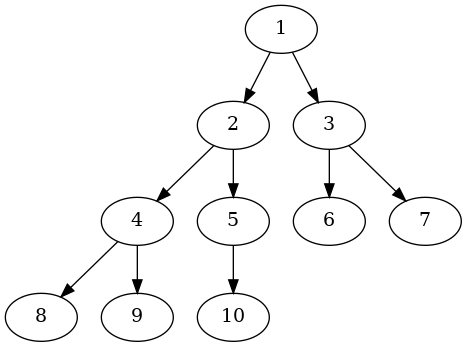

In [13]:
import networkx as nx

bin_tree=nx.DiGraph()
bin_tree.add_edges_from([(1,2), (1,3), (2,4), (2,5), (3,6), (3,7),
                 (4,8), (4,9), (5,10)])
picture=nx.drawing.nx_agraph.to_agraph(bin_tree)
picture.layout('dot')
picture.draw('bintree.png')
Image('bintree.png')

In [14]:
breadth_first_search(bin_tree, 1)

1
2
3
4
5
6
7
8
9
10


In [15]:
depth_first_search(bin_tree, 1)

1
3
7
6
2
5
10
4
9
8


In [16]:
from typing import Self, Any

class NodeBinary:
    def __init__(self, value: Any, left: Self|None = None, right: Self|None = None) -> None:
        self.value: Any = value
        self.left: Self = left
        self.right: Self = right

    def __repr__(self) -> str:
        return f"Node({self.value})"

class BinaryTree:
    def __init__(self, root: NodeBinary) -> None:
        self.root: NodeBinary = root


Існує багато видів бінарних дерев. Особливий інтерес для нас представляє бінарне дерево пошуку.

Для того, щоб бінарне дерево було бінарним деревом пошуку, воно має задовільняти умові бінарного дерева пошуку. Воно має бути структуровано таким чином, щоб для кожної ноди зліва були тільки елементи менше від неї, а справа - тільки ті, що більше.

Будь який відсортований список може бути перетворений у BST. 

Загалом, це доволі глибока ідея: дерева можуть допомогти встановити ієрархічні зв'язки навіть між даними, чия структура здається пласкою

In [17]:
from typing import List, Optional

def arr_to_bst(arr: List[int]) -> Optional[NodeBinary]:
    if not arr:
        return None
    mid = len(arr)//2
    node = NodeBinary(arr[mid])
    node.left = arr_to_bst(arr[:mid])
    node.right = arr_to_bst(arr[mid + 1:])
    return node


In [18]:
arr = list(range(25))

In [19]:
tree = BinaryTree(arr_to_bst(arr))

DFS, насправді, є класом **проблем**, котрі є спільними як для графів, так і для дерев (бо дерева це такі графи).

Для бінарних дерев є 3 стратегії імплементації DFS:

* In-order traversal
* Pre-order traversal
* Post-order traversal

In [20]:
root = tree.root

In [21]:
def in_order_traversal(tree: NodeBinary) -> None:
    if tree:
        in_order_traversal(tree.left)
        print(tree)
        in_order_traversal(tree.right)


In [22]:
in_order_traversal(root)

Node(0)
Node(1)
Node(2)
Node(3)
Node(4)
Node(5)
Node(6)
Node(7)
Node(8)
Node(9)
Node(10)
Node(11)
Node(12)
Node(13)
Node(14)
Node(15)
Node(16)
Node(17)
Node(18)
Node(19)
Node(20)
Node(21)
Node(22)
Node(23)
Node(24)


In [23]:
def pre_order_traversal(tree: NodeBinary) -> None:
    if tree:
        print(tree)
        pre_order_traversal(tree.left)
        pre_order_traversal(tree.right)

In [24]:
pre_order_traversal(root)

Node(12)
Node(6)
Node(3)
Node(1)
Node(0)
Node(2)
Node(5)
Node(4)
Node(9)
Node(8)
Node(7)
Node(11)
Node(10)
Node(19)
Node(16)
Node(14)
Node(13)
Node(15)
Node(18)
Node(17)
Node(22)
Node(21)
Node(20)
Node(24)
Node(23)


In [25]:
def post_order_traversal(tree: NodeBinary) -> None:
    if tree:
        post_order_traversal(tree.left)
        post_order_traversal(tree.right)
        print(tree)

In [26]:
post_order_traversal(root)

Node(0)
Node(2)
Node(1)
Node(4)
Node(5)
Node(3)
Node(7)
Node(8)
Node(10)
Node(11)
Node(9)
Node(6)
Node(13)
Node(15)
Node(14)
Node(17)
Node(18)
Node(16)
Node(20)
Node(21)
Node(23)
Node(24)
Node(22)
Node(19)
Node(12)


Так як BST це структура даних, що підтримує **порядок** елементів, для нього можливі також операції максимума і мінімума

In [27]:
def maximum_bst(tree: NodeBinary) -> NodeBinary:
    if tree.right:
        return maximum_bst(tree.right)
    return tree

def maximum_bst_iterative(tree: NodeBinary) -> NodeBinary:
    while tree.right:
        tree = tree.right
    return tree

In [28]:
maximum_bst_iterative(root)

Node(24)

In [29]:
def minimum_bst(tree: NodeBinary) -> NodeBinary:
    if tree.left:
        return minimum_bst(tree.left)
    return tree

def minimum_bst_iterative(tree: NodeBinary) -> NodeBinary:
    while tree.left:
        tree = tree.left
    return tree

In [30]:
minimum_bst(root)

Node(0)

Яка асимптотична складність цих двох алгоритмів?

Також для дерев (в т.ч. і BST) можливі операції вставки та видалення.

In [31]:
def insert_bst(tree: NodeBinary, value: int) -> NodeBinary:
    if not tree:
        return NodeBinary(value)
    if value < tree.value:
        tree.left = insert_bst(tree.left, value)
    else:
        tree.right = insert_bst(tree.right, value)
    return tree

In [32]:
insert_bst(root, 25)

Node(12)

In [33]:
maximum_bst_iterative(root)

Node(25)

In [34]:
def delete_bst(tree: NodeBinary, value: int) -> NodeBinary:
    if not tree:
        return None
    if value < tree.value:
        tree.left = delete_bst(tree.left, value)
    elif value > tree.value:
        tree.right = delete_bst(tree.right, value)
    else:
        if not tree.left:
            return tree.right
        if not tree.right:
            return tree.left
        temp = minimum_bst(tree.right)
        tree.value = temp.value
        tree.right = delete_bst(tree.right, temp.value)
    return tree

In [35]:
delete_bst(root, 17)

Node(12)

In [36]:
in_order_traversal(root)

Node(0)
Node(1)
Node(2)
Node(3)
Node(4)
Node(5)
Node(6)
Node(7)
Node(8)
Node(9)
Node(10)
Node(11)
Node(12)
Node(13)
Node(14)
Node(15)
Node(16)
Node(18)
Node(19)
Node(20)
Node(21)
Node(22)
Node(23)
Node(24)
Node(25)


Поняття "розміру" дерева є нетривальним, навідміну від лінійних структур даних.

В деревах ми можемо виділити як мінімум три метрики:

* Кількість елементів
* Кількість **листів**
* Висота дерева

Під **висотою** ми матимемо на увазі кількість кроків, котрі треба зробити від кореня до найбільш віддаленого листа

In [41]:
def height_of_tree(tree: NodeBinary) -> int:
    if not tree:
        return 0
    return max(height_of_tree(tree.left), height_of_tree(tree.right)) + 1

In [42]:
height_of_tree(root)

5

В бінарних дерев (ширше, в дерев ступеню n, наприклад, тернарні дерева тощо) ми спостерігаємо наступну властивість: для кожного рівня **максимальна** кількість нод на ньому = n**level.

Але для однієї кількості нод ми можемо мати різні конфігурації дерев згідно їхнього рівня.

Перш за все нас цікавлять так звані збалансовані бінарні дерева.

Дерево є збалансованим тоді, коли його ліве і праве під-дерево мають висоти, що відрізняються не більше ніж на 1.

In [43]:
def is_tree_balanced(tree: NodeBinary) -> bool:
    left_height = height_of_tree(tree.left)
    right_height = height_of_tree(tree.right)
    return abs(left_height - right_height) <= 1

In [38]:
from copy import copy

root_skewed = copy(root)
root_skewed.left = None

In [39]:
in_order_traversal(root_skewed)

Node(12)
Node(13)
Node(14)
Node(15)
Node(16)
Node(18)
Node(19)
Node(20)
Node(21)
Node(22)
Node(23)
Node(24)
Node(25)


In [ ]:
is_tree_balanced(root)

In [45]:
is_tree_balanced(root_skewed)

False

Збалансовані бінарні дерева мають важливу властивість: їхня висота h=log(n), де n - кількість елементів у бінарному дереві. Бо n = 2**h згідно попереднього твердження

З урахуванням того, що складність усіх базових операцій з бінарним деревом **окрім обходу** (пошук, вставка, видалення, максимум, мінімум) складає O(h), всі ці операції є **логарифмічними**.

Звідси і логарифмічний характер складності бінарного пошуку.

Як ми бачимо, існують ситуації, коли бінарне дерево може бути незбалансоване (skewed). Для вирішення цих ситуацій існують алгоритми ре-балансировки дерев і додаткові само-збалансовані структури даних (AVL-дерева, RB-дерева тощо).

Також зазначимо, що створення BST з відсортованого масиву завжди продукує **збалансоване** дерево.

In [55]:
def rebalance_binary_tree(tree: NodeBinary) -> NodeBinary:
    arr = list()
    
    def in_order_traversal(tree: NodeBinary) -> None:
        if tree:
            in_order_traversal(tree.left)
            arr.append(tree.value)
            in_order_traversal(tree.right)

    in_order_traversal(tree)
    return arr_to_bst(arr)

In [56]:
is_tree_balanced(rebalance_binary_tree(root_skewed))

True